# 인물 사진 만들기

In [1]:
import os
import urllib
import cv2
import numpy as np
from glob import glob
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

## 내 사진

(1440, 1080, 3)


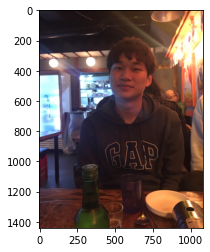

In [2]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/asd.JPG'
img_orig = cv2.imread(img_path)

print(img_orig.shape)

plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [3]:
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 
urllib.request.urlretrieve(model_url, model_file)

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7fecea449400>)

In [4]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file) 

In [5]:
segvalues, output = model.segmentAsPascalvoc(img_path) 

In [6]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

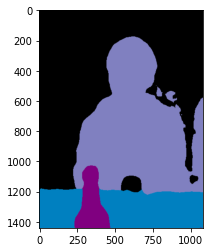

In [7]:
plt.imshow(output)
plt.show()

In [8]:
segvalues

{'class_ids': array([ 0,  5, 11, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]])}

In [9]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [10]:
colormap[15]

array([192, 128, 128])

In [11]:
seg_color = (128,128,192)

(1440, 1080)


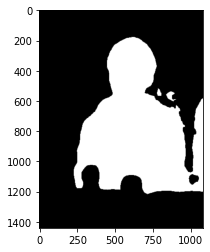

In [12]:
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()

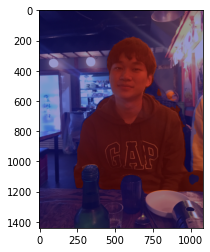

In [13]:
img_show = img_orig.copy()
img_mask = seg_map.astype(np.uint8) * 255
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

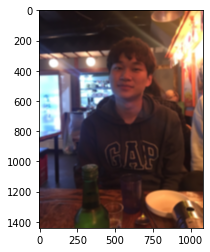

In [14]:
img_orig_blur = cv2.blur(img_orig, (13,13))
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

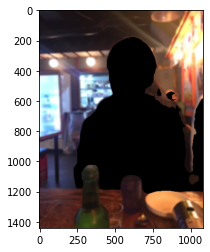

In [15]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

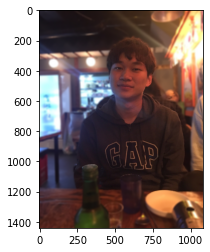

In [16]:
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

## 고양이 사진

(1400, 1050, 3)


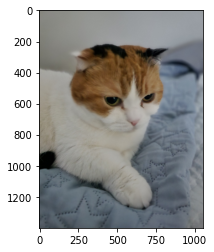

In [17]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/qwe.jpg'
img_orig = cv2.imread(img_path)

print(img_orig.shape)

plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

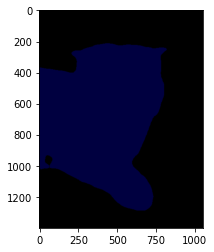

In [18]:
segvalues, output = model.segmentAsPascalvoc(img_path)

plt.imshow(output)
plt.show()

In [19]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
cat


In [20]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:8]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128]])

In [21]:
seg_color = (0,0,64)

(1400, 1050)


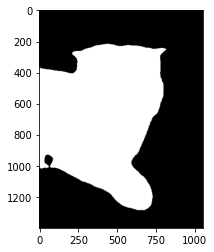

In [22]:
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()

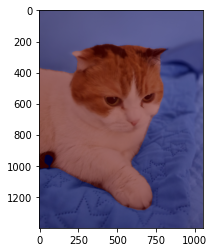

In [23]:
img_show = img_orig.copy()
img_mask = seg_map.astype(np.uint8) * 255
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

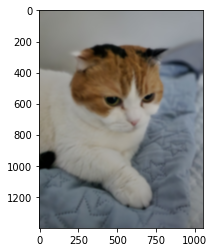

In [24]:
img_orig_blur = cv2.blur(img_orig, (13,13))
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

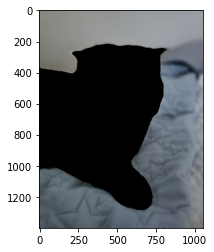

In [25]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

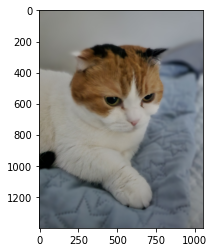

In [26]:
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

## 크로마키사진

(1400, 1050, 3)


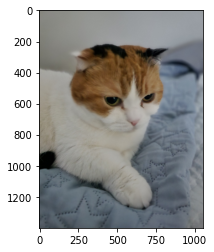

In [27]:
# 고양이 사진
cat_img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/qwe.jpg'
cat_img_orig = cv2.imread(cat_img_path)

print(cat_img_orig.shape)

plt.imshow(cv2.cvtColor(cat_img_orig, cv2.COLOR_BGR2RGB))

(1066, 1600, 3)


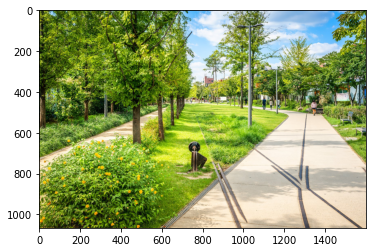

In [28]:
#배경사진
b_img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/ff.jpg'  
b_img_orig = cv2.imread(b_img_path) 

print(b_img_orig.shape)
plt.imshow(cv2.cvtColor(b_img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [29]:
b_img_orig_resize = cv2.resize(b_img_orig,(cat_img_orig.shape[1], cat_img_orig.shape[0]))

cat_segvalues, cat_output = model.segmentAsPascalvoc(cat_img_path)

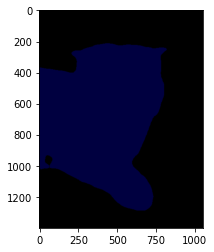

In [30]:
plt.imshow(cat_output)
plt.show()


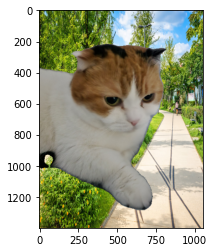

In [32]:
cat_img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
b_img_concat = np.where(cat_img_mask_color==255, cat_img_orig, b_img_orig_resize)

plt.imshow(cv2.cvtColor(b_img_concat, cv2.COLOR_BGR2RGB))
plt.show()

### 문제점

내 사진과 고양이 사진에서는 문제가 크게 드러나지 않았었는데

크로마키 사진에서 고양이의 꼬리가 뚫려서 나왔다.

이미지 사이즈를 키우거나

블러 처리된 부분의 정확도를 올리기 위해 마스크 범위를 수정

하는 방법을 통해 자연스러운 합성이 될 것이라 생각한다.